# Pandas

- Pandas is a data analysis package
- Pandas run on the top of numpy


In [48]:
# !pip install pandas
# !pip install seaborn

In [49]:

import numpy as np
import pandas as pd
import seaborn as sns

# Creating a dataframe object

In [ ]:
data = {'name' : ['John','David','Sara'],
        'Salary' : [50,70,60],
        'Email' : ['John@yahoolmail.com', 'David@google.com','Sara@gmail.com']}

data

In [ ]:
pd.DataFrame(data)

In [ ]:
names = ['John','David','Sara']
salaries = [50,70,60]
emails = ['John@yahoolmail.com', 'David@google.com','Sara@gmail.com']
data = list(zip(names,salaries,emails))
data

In [ ]:
df = pd.DataFrame(data, columns = ['Name','Salary','Email'])
df

In [ ]:
type(df)

In [ ]:
pd.DataFrame([1,2,3])

# Reading DataFrame from External Files


In [10]:
df = pd.read_csv(r'D:\Training\LTIMindTree\Python\data\loans data.csv')

In [ ]:
df.head(2)

In [ ]:
df.tail(2)

In [ ]:
df.sample()

In [ ]:
df.shape

# DataFrame Subsetting / Slicing

## 1. iloc : Integer Location
- df.iloc[row,col]

In [ ]:
df

In [ ]:
df.iloc[::2,:]

In [ ]:
df.iloc[:5,:]

In [ ]:
df.iloc[7,8]

## 2.loc

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.head(3)

In [ ]:
df.loc[0:5,['ID','State']]

In [ ]:
df.loc[0:5,'ID':'FICO.Range']

In [ ]:
df.head()

In [ ]:
df.set_index('ID', inplace = True)
df.head(3)

In [ ]:
df.reset_index(inplace = True)
df.head()

In [ ]:
df.set_index('ID', inplace = True)
df.head(3)

In [ ]:
df.sort_index()

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.head()

# Core components of pandas

### 1. pandas dataframe

In [ ]:
type(df)

In [ ]:
type(df.iloc[:5,:5])

In [ ]:
df[['ID','State']].values

In [ ]:
type(df[['ID','State']])

### 2. pandas series

In [ ]:
type(df.iloc[0])

In [ ]:
type(df.iloc[:,0])

In [ ]:
df.iloc[0,0]

In [ ]:
type(df.iloc[0,0])

In [ ]:
type(df['State'])

In [ ]:
type(df.State)

In [ ]:
df.iloc[0]

In [ ]:
df['State'].index

# Conditional Filtering

In [ ]:
df.head(3)

In [ ]:
df['Home.Ownership'].value_counts()

In [ ]:
# get all records where home ownership is mortgage
df[df['Home.Ownership'] == 'MORTGAGE'].shape

In [ ]:
# get all records for the State Texas (TX)

df[df['State'] == 'TX'].shape

In [ ]:
# Get all texas records where home ownership is mortgage

df[(df['State'] == 'TX') & (df['Home.Ownership'] == 'MORTGAGE')].shape

In [ ]:
# get all records where state is texas or New Jersey

df[(df['State'] == 'TX') | (df['State'] == 'NJ')].shape

In [ ]:
# get all records where state is texas or New Jersey

df[df['State'].isin(['NJ','TX'])].shape

In [ ]:
# get all records where home ownership is not mortgage

df[~(df['Home.Ownership'] == 'MORTGAGE')].shape

In [ ]:
# get all records where State is NJ,SC or NY

df[df['State'].isin(['NY','NJ','SC'])].shape

In [ ]:
# Repeat above with np.where
df.iloc[np.where(df['State'].isin(['NY','NJ','SC']))].shape

In [ ]:
# Get NJ records with Loan purpose as either home_improvement/major purchase and monthly income < 5000

df[(df['State'] == 'NJ') & (df['Loan.Purpose'].isin(['major_purchase','home_improvement'])) & (df['Monthly.Income'] < 5000)].shape

In [ ]:
# Get non NJ records with Loan purpose except home_improvement/major purchase and monthly income < 1000

df[~(df['State'] == 'NJ') & ~(df['Loan.Purpose'].isin(['major_purchase','home_improvement'])) & (df['Monthly.Income'] < 1000)].shape

# Data Processing

- drop columns
- add columns
- changing datatype of columns
- handling missing values
- Feature Scaling

### Add columns

In [ ]:
# add columns

df['New Col'] = 0
df

### Drop Columns

In [ ]:
# drop columns

del df['New Col']
# df.drop(['ID','Home.Ownership'], axis = 1)
# df = df.drop(['ID','Home.Ownership'], axis = 1)
# df.drop(['ID','Home.Ownership'], axis = 1, inplace = True)


In [ ]:
df

### Changing datatypes of your columns

In [ ]:
# Changing datatypes
df.dtypes

In [ ]:
df[df['Amount.Requested'] == '.']

In [11]:
df['Amount.Requested'] = pd.to_numeric(df['Amount.Requested'],errors = 'coerce')

In [20]:
df['Loan.Length'].value_counts()

Loan.Length
36 months    1951
60 months     548
.               1
Name: count, dtype: int64

In [ ]:
df.head()

In [ ]:
df['Loan.Length'] = df['Loan.Length'].str.replace("months","")

In [15]:
df['Loan.Length'].isnull().sum()

1

In [19]:
df[df['Loan.Length'].isna()]

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length


In [18]:
df['Loan.Length'] = np.where(df['Loan.Length'].isna(), '36 months', df['Loan.Length'])

In [22]:
df['Loan.Length'] = df['Loan.Length'].apply(lambda x: x.replace("months",""))

In [23]:
df['Interest.Rate'].apply(lambda x: x.replace("%", ""))

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest.Rate, Length: 2500, dtype: object

In [24]:
df[['Interest.Rate','Debt.To.Income.Ratio']].apply(lambda x: x.str.replace("%", ""))

,Interest.Rate,Debt.To.Income.Ratio
0,8.90,14.90
1,12.12,28.36
2,21.98,23.81
3,9.99,14.30
4,11.71,18.78
...,...,...
2495,16.77,19.23
2496,14.09,21.54
2497,13.99,4.89
2498,12.42,16.66


In [25]:
df[['Interest.Rate','Debt.To.Income.Ratio']] = df[['Interest.Rate','Debt.To.Income.Ratio']].apply(lambda x: x.str.replace("%", ""))

In [26]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000.0,20000,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200.0,19200,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000.0,35000,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000.0,9975,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000.0,12000,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [27]:
len(df['FICO.Range'].value_counts())

38

In [28]:
df['FICO.Range'].str.split("-",expand = True)

,0,1
0,735,739
1,715,719
2,690,694
3,695,699
4,695,699
...,...,...
2495,705,709
2496,740,744
2497,680,684
2498,675,679


In [29]:
df[['Fico-low','Fico-high']] = df['FICO.Range'].str.split("-",expand = True)
del df['FICO.Range']
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico-low,Fico-high
0,81174.0,20000.0,20000,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14,14272,2.0,< 1 year,735,739
1,99592.0,19200.0,19200,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12,11140,1.0,2 years,715,719
2,80059.0,35000.0,35000,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14,21977,1.0,2 years,690,694
3,15825.0,10000.0,9975,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10,9346,0.0,5 years,695,699
4,33182.0,12000.0,12000,11.71,36,credit_card,18.78,NJ,RENT,3195.00,11,14469,0.0,9 years,695,699


In [30]:
df['Employment.Length'].unique()

array(['< 1 year', '2 years', '5 years', '9 years', '3 years',
       '10+ years', '8 years', '6 years', '1 year', '7 years', '.',
       '4 years', nan], dtype=object)

In [31]:
df['Employment.Length'] = df['Employment.Length'].str.replace('years','').\
                                                    str.replace('year','').\
                                                    str.replace('<','').\
                                                    str.replace('+','')


In [32]:
df.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
Fico-low                           object
Fico-high                          object
dtype: object

In [33]:
numeric_cols = ['Amount.Funded.By.Investors', 'Interest.Rate','Debt.To.Income.Ratio','Open.CREDIT.Lines',
                'Revolving.CREDIT.Balance','Inquiries.in.the.Last.6.Months','Fico-low','Fico-high']
df_numerics = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df_numerics

,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
0,20000.00,8.90,14.90,14.0,14272.0,2.0,735,739
1,19200.00,12.12,28.36,12.0,11140.0,1.0,715,719
2,35000.00,21.98,23.81,14.0,21977.0,1.0,690,694
3,9975.00,9.99,14.30,10.0,9346.0,0.0,695,699
4,12000.00,11.71,18.78,11.0,14469.0,0.0,695,699
...,...,...,...,...,...,...,...,...
2495,29950.00,16.77,19.23,15.0,45880.0,1.0,705,709
2496,16000.00,14.09,21.54,18.0,18898.0,1.0,740,744
2497,10000.00,13.99,4.89,4.0,4544.0,0.0,680,684
2498,6000.00,12.42,16.66,8.0,NaN,0.0,675,679


In [34]:
df.drop(numeric_cols, axis = 1,inplace = True)
df

,ID,Amount.Requested,Loan.Length,Loan.Purpose,State,Home.Ownership,Monthly.Income,Employment.Length
0,81174.0,20000.0,36,debt_consolidation,SC,MORTGAGE,6541.67,1
1,99592.0,19200.0,36,debt_consolidation,TX,MORTGAGE,4583.33,2
2,80059.0,35000.0,60,debt_consolidation,CA,MORTGAGE,11500.00,2
3,15825.0,10000.0,36,debt_consolidation,KS,MORTGAGE,3833.33,5
4,33182.0,12000.0,36,credit_card,NJ,RENT,3195.00,9
...,...,...,...,...,...,...,...,...
2495,23735.0,30000.0,60,debt_consolidation,NY,MORTGAGE,9250.00,8
2496,65882.0,16000.0,60,home_improvement,MD,OWN,8903.25,10
2497,55610.0,10000.0,36,debt_consolidation,PA,MORTGAGE,2166.67,10
2498,38576.0,6000.0,36,major_purchase,NJ,RENT,3500.00,5


In [35]:
df = pd.concat([df,df_numerics],axis = 1)
df

,ID,Amount.Requested,Loan.Length,Loan.Purpose,State,Home.Ownership,Monthly.Income,Employment.Length,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
0,81174.0,20000.0,36,debt_consolidation,SC,MORTGAGE,6541.67,1,20000.00,8.90,14.90,14.0,14272.0,2.0,735,739
1,99592.0,19200.0,36,debt_consolidation,TX,MORTGAGE,4583.33,2,19200.00,12.12,28.36,12.0,11140.0,1.0,715,719
2,80059.0,35000.0,60,debt_consolidation,CA,MORTGAGE,11500.00,2,35000.00,21.98,23.81,14.0,21977.0,1.0,690,694
3,15825.0,10000.0,36,debt_consolidation,KS,MORTGAGE,3833.33,5,9975.00,9.99,14.30,10.0,9346.0,0.0,695,699
4,33182.0,12000.0,36,credit_card,NJ,RENT,3195.00,9,12000.00,11.71,18.78,11.0,14469.0,0.0,695,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000.0,60,debt_consolidation,NY,MORTGAGE,9250.00,8,29950.00,16.77,19.23,15.0,45880.0,1.0,705,709
2496,65882.0,16000.0,60,home_improvement,MD,OWN,8903.25,10,16000.00,14.09,21.54,18.0,18898.0,1.0,740,744
2497,55610.0,10000.0,36,debt_consolidation,PA,MORTGAGE,2166.67,10,10000.00,13.99,4.89,4.0,4544.0,0.0,680,684
2498,38576.0,6000.0,36,major_purchase,NJ,RENT,3500.00,5,6000.00,12.42,16.66,8.0,NaN,0.0,675,679


In [36]:
df.dtypes

ID                                float64
Amount.Requested                  float64
Loan.Length                        object
Loan.Purpose                       object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Employment.Length                  object
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Fico-low                            int64
Fico-high                           int64
dtype: object

### Missing Value han3dling

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2495 non-null   float64
 2   Loan.Length                     2500 non-null   object 
 3   Loan.Purpose                    2499 non-null   object 
 4   State                           2499 non-null   object 
 5   Home.Ownership                  2499 non-null   object 
 6   Monthly.Income                  2497 non-null   float64
 7   Employment.Length               2422 non-null   object 
 8   Amount.Funded.By.Investors      2495 non-null   float64
 9   Interest.Rate                   2500 non-null   float64
 10  Debt.To.Income.Ratio            2499 non-null   float64
 11  Open.CREDIT.Lines               2491 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [52]:
df['Amount.Requested'].describe()

count     2495.000000
mean     12412.414830
std       7805.575427
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      17000.000000
max      35000.000000
Name: Amount.Requested, dtype: float64

In [60]:
sns.boxplot(x = df['Amount.Requested'])

In [61]:
sns.kdeplot(df['Amount.Requested'])

In [62]:
sns.histplot(x = df['Amount.Requested'], kde = True, fill = False)

In [45]:
df.isnull().sum(axis = 0)

ID                                 1
Amount.Requested                   5
Loan.Length                        0
Loan.Purpose                       1
State                              1
Home.Ownership                     1
Monthly.Income                     3
Employment.Length                 78
Amount.Funded.By.Investors         5
Interest.Rate                      0
Debt.To.Income.Ratio               1
Open.CREDIT.Lines                  9
Revolving.CREDIT.Balance           5
Inquiries.in.the.Last.6.Months     3
Fico-low                           0
Fico-high                          0
dtype: int64

In [64]:
df['Employment.Length'].value_counts()

Employment.Length
10     653
 1     249
2      243
3      235
5      202
4      191
1      177
6      163
7      127
8      108
9       72
.        2
Name: count, dtype: int64

In [69]:
df['Employment.Length'] = df['Employment.Length'].fillna(df['Employment.Length'].mode().values[0])

In [70]:
df.isnull().sum()

ID                                1
Amount.Requested                  5
Loan.Length                       0
Loan.Purpose                      1
State                             1
Home.Ownership                    1
Monthly.Income                    3
Employment.Length                 0
Amount.Funded.By.Investors        5
Interest.Rate                     0
Debt.To.Income.Ratio              1
Open.CREDIT.Lines                 9
Revolving.CREDIT.Balance          5
Inquiries.in.the.Last.6.Months    3
Fico-low                          0
Fico-high                         0
dtype: int64

<Axes: xlabel='Open.CREDIT.Lines', ylabel='Density'>

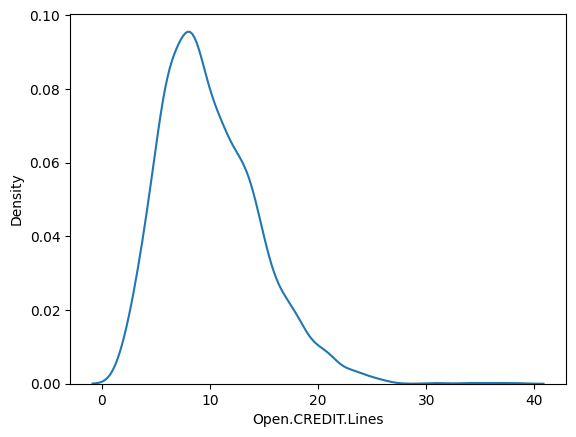

In [73]:
sns.kdeplot(df['Open.CREDIT.Lines'])

In [74]:
df['Open.CREDIT.Lines'].describe()

count    2491.000000
mean       10.082698
std         4.510094
min         2.000000
25%         7.000000
50%         9.000000
75%        13.000000
max        38.000000
Name: Open.CREDIT.Lines, dtype: float64

In [75]:
df['Open.CREDIT.Lines'].median()

9.0

In [77]:
df['Open.CREDIT.Lines'] = np.where(df['Open.CREDIT.Lines'].isna(), df['Open.CREDIT.Lines'].median(), df['Open.CREDIT.Lines'])

In [79]:
df.isnull().sum().sum()

26

In [81]:
df = df.dropna()
df.shape

(2478, 16)

In [82]:
df.isnull().sum()

ID                                0
Amount.Requested                  0
Loan.Length                       0
Loan.Purpose                      0
State                             0
Home.Ownership                    0
Monthly.Income                    0
Employment.Length                 0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Debt.To.Income.Ratio              0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Fico-low                          0
Fico-high                         0
dtype: int64

In [83]:
# Drop Duplicates

df.drop_duplicates()

,ID,Amount.Requested,Loan.Length,Loan.Purpose,State,Home.Ownership,Monthly.Income,Employment.Length,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high
0,81174.0,20000.0,36,debt_consolidation,SC,MORTGAGE,6541.67,1,20000.00,8.90,14.90,14.0,14272.0,2.0,735,739
1,99592.0,19200.0,36,debt_consolidation,TX,MORTGAGE,4583.33,2,19200.00,12.12,28.36,12.0,11140.0,1.0,715,719
2,80059.0,35000.0,60,debt_consolidation,CA,MORTGAGE,11500.00,2,35000.00,21.98,23.81,14.0,21977.0,1.0,690,694
3,15825.0,10000.0,36,debt_consolidation,KS,MORTGAGE,3833.33,5,9975.00,9.99,14.30,10.0,9346.0,0.0,695,699
4,33182.0,12000.0,36,credit_card,NJ,RENT,3195.00,9,12000.00,11.71,18.78,11.0,14469.0,0.0,695,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,49957.0,24000.0,36,debt_consolidation,WA,MORTGAGE,6666.67,5,23975.00,14.65,15.29,13.0,17521.0,0.0,685,689
2495,23735.0,30000.0,60,debt_consolidation,NY,MORTGAGE,9250.00,8,29950.00,16.77,19.23,15.0,45880.0,1.0,705,709
2496,65882.0,16000.0,60,home_improvement,MD,OWN,8903.25,10,16000.00,14.09,21.54,18.0,18898.0,1.0,740,744
2497,55610.0,10000.0,36,debt_consolidation,PA,MORTGAGE,2166.67,10,10000.00,13.99,4.89,4.0,4544.0,0.0,680,684


### Encoding:

- Converting categorical variable to numeric
  1. One Hot Encoding
  2. Label Encoding

In [84]:
df['State'].value_counts()

State
CA    430
NY    253
TX    173
FL    169
IL    100
GA     97
PA     96
NJ     92
VA     77
MA     72
OH     70
MD     65
NC     64
CO     61
WA     57
CT     50
AZ     46
MI     44
AL     38
MN     37
MO     33
NV     32
OR     29
SC     27
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
AK     11
DC     11
HI     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
IA      1
.       1
MS      1
Name: count, dtype: int64

In [85]:
df['Home.Ownership'].value_counts()

Home.Ownership
RENT        1138
MORTGAGE    1137
OWN          198
OTHER          5
Name: count, dtype: int64

In [89]:
pd.get_dummies(df['Home.Ownership'], prefix = "ho", drop_first= True).astype(int)

,ho_OTHER,ho_OWN,ho_RENT
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
2494,0,0,0
2495,0,0,0
2496,0,1,0
2497,0,0,0


In [95]:
categorical_cols = list(df.select_dtypes('object').columns)
categorical_cols

['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'Employment.Length']

In [101]:
df['Loan.Length'] = np.where(df['Loan.Length'] == '.', '36 ',df['Loan.Length'])
df['Loan.Length'].value_counts()

C:\Users\Naaaz\AppData\Local\Temp\ipykernel_4472\2501712403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan.Length'] = np.where(df['Loan.Length'] == '36', '36 ',df['Loan.Length'])


Loan.Length
36     1933
60      545
Name: count, dtype: int64

In [102]:
df['Loan.Length'].unique()

array(['36 ', '60 '], dtype=object)

In [117]:
df_dummies = pd.DataFrame()
for col in categorical_cols:
    df_dummies = pd.concat([df_dummies, pd.get_dummies(df[col], prefix = col, drop_first = True).astype(int)], axis = 1)

In [108]:
df = df.drop(categorical_cols,axis = 1)

In [116]:
df = pd.concat([df,df_dummies], axis = 1)

In [118]:
df.shape

(2478, 85)

In [115]:
df.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
# !pip install scikit-learn

In [121]:
df1 = pd.read_csv(r'D:\Training\LTIMindTree\Python\data\loans data.csv')

In [122]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [124]:
df1[['Home.Ownership']]

,Home.Ownership
0,MORTGAGE
1,MORTGAGE
2,MORTGAGE
3,MORTGAGE
4,RENT
...,...
2495,MORTGAGE
2496,OWN
2497,MORTGAGE
2498,RENT


In [125]:
ohe.fit_transform(df1[['Home.Ownership']])

C:\Users\Naaaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [127]:
le.fit_transform(df1[['State']])

C:\Users\Naaaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([37, 39,  5, ..., 35, 28, 31])

### Feature Scaling:
```
- Multiple independent features having different scales are not good for some models, hence scaling is necessary for some models
- 2 most common techniques used for Scaling:
      1. Normalization: Scale between 0 - 1 (MinMaxScaler most common)
      2. Standardization: Scale based on standard normal distribution (StandardScaler
```

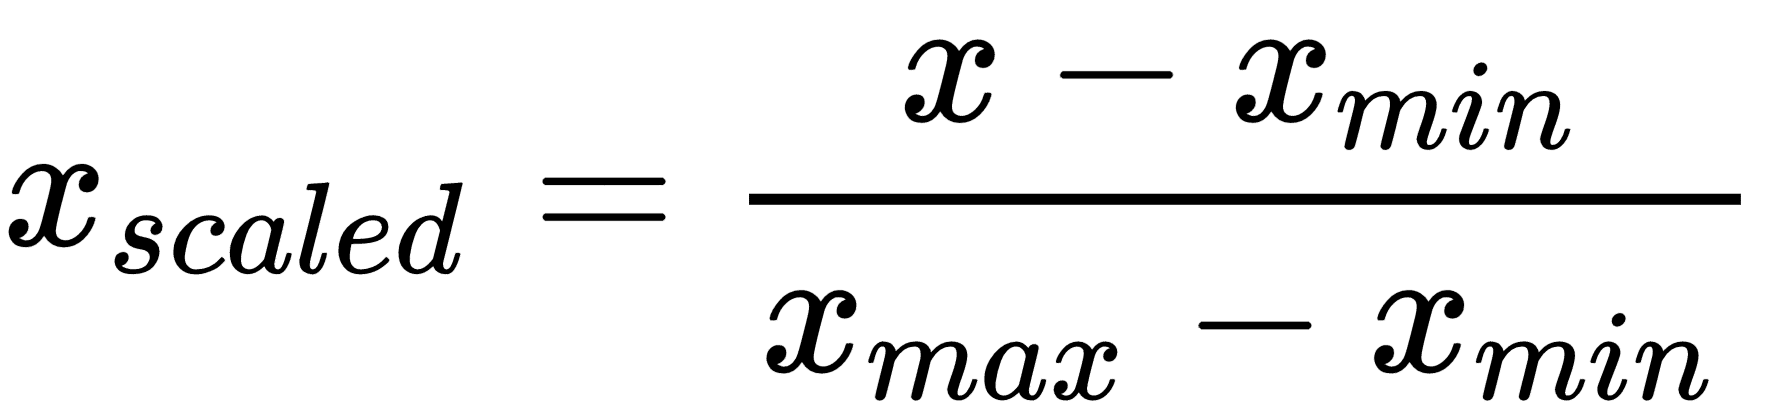

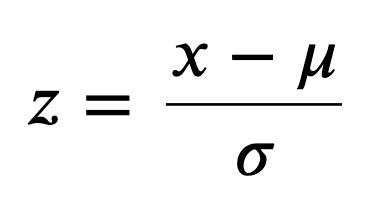

In [128]:
df

,ID,Amount.Requested,Monthly.Income,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,...,Employment.Length_1,Employment.Length_10,Employment.Length_2,Employment.Length_3,Employment.Length_4,Employment.Length_5,Employment.Length_6,Employment.Length_7,Employment.Length_8,Employment.Length_9
0,81174.0,20000.0,6541.67,20000.00,8.90,14.90,14.0,14272.0,2.0,735,...,0,0,0,0,0,0,0,0,0,0
1,99592.0,19200.0,4583.33,19200.00,12.12,28.36,12.0,11140.0,1.0,715,...,0,0,1,0,0,0,0,0,0,0
2,80059.0,35000.0,11500.00,35000.00,21.98,23.81,14.0,21977.0,1.0,690,...,0,0,1,0,0,0,0,0,0,0
3,15825.0,10000.0,3833.33,9975.00,9.99,14.30,10.0,9346.0,0.0,695,...,0,0,0,0,0,1,0,0,0,0
4,33182.0,12000.0,3195.00,12000.00,11.71,18.78,11.0,14469.0,0.0,695,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,49957.0,24000.0,6666.67,23975.00,14.65,15.29,13.0,17521.0,0.0,685,...,0,0,0,0,0,1,0,0,0,0
2495,23735.0,30000.0,9250.00,29950.00,16.77,19.23,15.0,45880.0,1.0,705,...,0,0,0,0,0,0,0,0,1,0
2496,65882.0,16000.0,8903.25,16000.00,14.09,21.54,18.0,18898.0,1.0,740,...,0,1,0,0,0,0,0,0,0,0
2497,55610.0,10000.0,2166.67,10000.00,13.99,4.89,4.0,4544.0,0.0,680,...,0,1,0,0,0,0,0,0,0,0


In [129]:
del df['ID']

In [130]:
df

,Amount.Requested,Monthly.Income,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico-low,Fico-high,...,Employment.Length_1,Employment.Length_10,Employment.Length_2,Employment.Length_3,Employment.Length_4,Employment.Length_5,Employment.Length_6,Employment.Length_7,Employment.Length_8,Employment.Length_9
0,20000.0,6541.67,20000.00,8.90,14.90,14.0,14272.0,2.0,735,739,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,4583.33,19200.00,12.12,28.36,12.0,11140.0,1.0,715,719,...,0,0,1,0,0,0,0,0,0,0
2,35000.0,11500.00,35000.00,21.98,23.81,14.0,21977.0,1.0,690,694,...,0,0,1,0,0,0,0,0,0,0
3,10000.0,3833.33,9975.00,9.99,14.30,10.0,9346.0,0.0,695,699,...,0,0,0,0,0,1,0,0,0,0
4,12000.0,3195.00,12000.00,11.71,18.78,11.0,14469.0,0.0,695,699,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,24000.0,6666.67,23975.00,14.65,15.29,13.0,17521.0,0.0,685,689,...,0,0,0,0,0,1,0,0,0,0
2495,30000.0,9250.00,29950.00,16.77,19.23,15.0,45880.0,1.0,705,709,...,0,0,0,0,0,0,0,0,1,0
2496,16000.0,8903.25,16000.00,14.09,21.54,18.0,18898.0,1.0,740,744,...,0,1,0,0,0,0,0,0,0,0
2497,10000.0,2166.67,10000.00,13.99,4.89,4.0,4544.0,0.0,680,684,...,0,1,0,0,0,0,0,0,0,0


In [134]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
min_max_scaler = MinMaxScaler()
standard_scalar = StandardScaler()

In [135]:
standard_scalar.fit_transform(df[['Amount.Requested']])

array([[ 0.96892341],
       [ 0.86635375],
       [ 2.89210448],
       ...,
       [ 0.45607512],
       [-0.31319731],
       [-0.44140938]])

In [133]:
min_max_scaler.fit_transform(df[['Amount.Requested']])

array([[0.55882353],
       [0.53529412],
       [1.        ],
       ...,
       [0.44117647],
       [0.26470588],
       [0.23529412]])

# Group by

In [137]:
df.groupby('Home.Ownership')['Amount.Requested'].min()

In [ ]:
df.groupby('Home.Ownership')['Amount.Requested'].agg([min,max])

In [ ]:
df.groupby(['Home.Ownership','Loan.Length'])['Amount.Requested'].agg([min,max])

# Sorting and merging

In [ ]:
df.columns

In [ ]:
df.sort_values('Amount.Requested')

In [ ]:
df.sort_values('Amount.Requested', ascending=False)

In [ ]:
df[['ID','State','Amount.Requested']].sort_values(['State','Amount.Requested'])

In [ ]:
df[['ID','State','Amount.Requested']].sort_values(['State','Amount.Requested'], ascending=[True,False])

In [138]:
df1 = pd.DataFrame({'cust_id' : range(1,6),
                    'product' : ['Fridge','Radio','Fridge','Fridge','Phone']})
df2 = pd.DataFrame({'cust_id' : [3,4,5,6,7],
                    'state' : ['UP','UP','UP','MH','MH']})
                   

In [139]:
df1

,cust_id,product
0,1,Fridge
1,2,Radio
2,3,Fridge
3,4,Fridge
4,5,Phone


In [140]:
df2

,cust_id,state
0,3,UP
1,4,UP
2,5,UP
3,6,MH
4,7,MH


In [141]:
pd.merge(df1,df2, on = 'cust_id', how = 'inner')

,cust_id,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP


In [142]:
pd.merge(df1,df2, on = 'cust_id', how = 'left')

,cust_id,product,state
0,1,Fridge,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP


In [143]:
pd.merge(df1,df2, on = 'cust_id', how = 'right')

,cust_id,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP
3,6,NaN,MH
4,7,NaN,MH


In [144]:
pd.merge(df1,df2, on = 'cust_id', how = 'outer')

,cust_id,product,state
0,1,Fridge,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP
5,6,NaN,MH
6,7,NaN,MH


# Univariate Statistics

In [146]:
df = pd.read_csv(r'D:\Training\LTIMindTree\Python\data\loans data.csv')

In [149]:
df.shape

(2500, 15)

In [150]:
df.describe()

,ID,Monthly.Income,Inquiries.in.the.Last.6.Months
count,2499.000000,2497.000000,2497.000000
mean,51643.325330,5689.716608,0.906688
std,30053.637661,3963.568002,1.231149
min,10.000000,588.500000,0.000000
25%,26570.500000,3500.000000,0.000000
50%,50673.000000,5000.000000,0.000000
75%,77583.000000,6800.000000,1.000000
max,104202.000000,102750.000000,9.000000


In [162]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].dtypes

Amount.Requested              float64
Monthly.Income                float64
Amount.Funded.By.Investors     object
Interest.Rate                  object
dtype: object

In [163]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].describe()

,Amount.Requested,Monthly.Income
count,2495.000000,2497.000000
mean,12412.414830,5689.716608
std,7805.575427,3963.568002
min,1000.000000,588.500000
25%,6000.000000,3500.000000
50%,10000.000000,5000.000000
75%,17000.000000,6800.000000
max,35000.000000,102750.000000


In [164]:
df[['Amount.Funded.By.Investors','Interest.Rate']].describe()

,Amount.Funded.By.Investors,Interest.Rate
count,2499,2500
unique,710,275
top,10000,12.12%
freq,164,122


In [165]:
df['Home.Ownership'].describe()

count         2499
unique           5
top       MORTGAGE
freq          1147
Name: Home.Ownership, dtype: object

In [153]:
df['Amount.Requested'].dtype

dtype('O')

In [154]:
df['Amount.Requested'].value_counts()

Amount.Requested
10000    205
12000    150
5000     110
20000    107
6000     103
        ... 
24175      1
11750      1
19725      1
32400      1
8475       1
Name: count, Length: 381, dtype: int64

In [159]:
df['Amount.Requested'] = pd.to_numeric(df['Amount.Requested'], errors = 'coerce')

In [160]:
df['Amount.Requested'].describe()

count     2495.000000
mean     12412.414830
std       7805.575427
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      17000.000000
max      35000.000000
Name: Amount.Requested, dtype: float64

In [172]:
df['Amount.Requested'].max()

35000.0

In [161]:
df['State'].describe()

count     2499
unique      47
top         CA
freq       433
Name: State, dtype: object

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].min()

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].max()

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].mean()

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].median()

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].sum()

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].quantile(0.25)

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].quantile(0.5)

In [ ]:
df[['Amount.Requested','Monthly.Income','Amount.Funded.By.Investors','Interest.Rate']].quantile(0.75)

In [ ]:
df

In [ ]:
df['State'].value_counts()

In [ ]:
df['State'].value_counts().values

In [ ]:
df[['Home.Ownership','State']].value_counts()

# Bivariate Statistics

In [ ]:
df.select_dtypes(['object']).columns

In [174]:
pd.crosstab(df['State'],df['Loan.Length'])

Loan.Length,.,36 months,60 months
State,,,
.,0,1,0
AK,0,6,5
AL,0,28,10
AR,0,12,1
AZ,0,37,9
CA,0,352,81
CO,0,51,10
CT,0,40,10
DC,0,6,5
